## Notebook Imports

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

## Data exploration with Pandas dataframes

## Cleaning data - check for missing values


In [98]:
data = pd.read_csv('boston.csv')
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [99]:
data.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [100]:
pd.isnull(data)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [101]:
data.isna()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [102]:
data.isna().any()

Unnamed: 0    False
CRIM          False
ZN            False
INDUS         False
CHAS          False
NOX           False
RM            False
AGE           False
DIS           False
RAD           False
TAX           False
PTRATIO       False
B             False
LSTAT         False
PRICE         False
dtype: bool

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [104]:
data.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [105]:
data.count()

Unnamed: 0    506
CRIM          506
ZN            506
INDUS         506
CHAS          506
NOX           506
RM            506
AGE           506
DIS           506
RAD           506
TAX           506
PTRATIO       506
B             506
LSTAT         506
PRICE         506
dtype: int64

In [106]:
data.shape

(506, 15)

In [107]:
data.duplicated().any()

False

## Visualising Data - Histograms, Distributions and Bar Charts


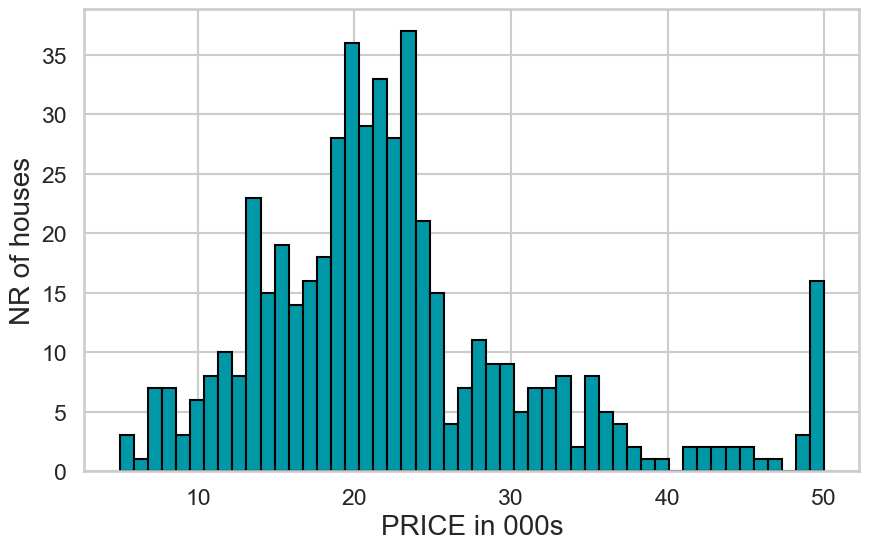

In [108]:
plt.figure(figsize=(10, 6))
plt.hist(data.PRICE, bins=50, ec='black', color='#0097A7')
plt.xlabel('PRICE in 000s', fontsize=20)
plt.ylabel('NR of houses', fontsize=20)
plt.show()

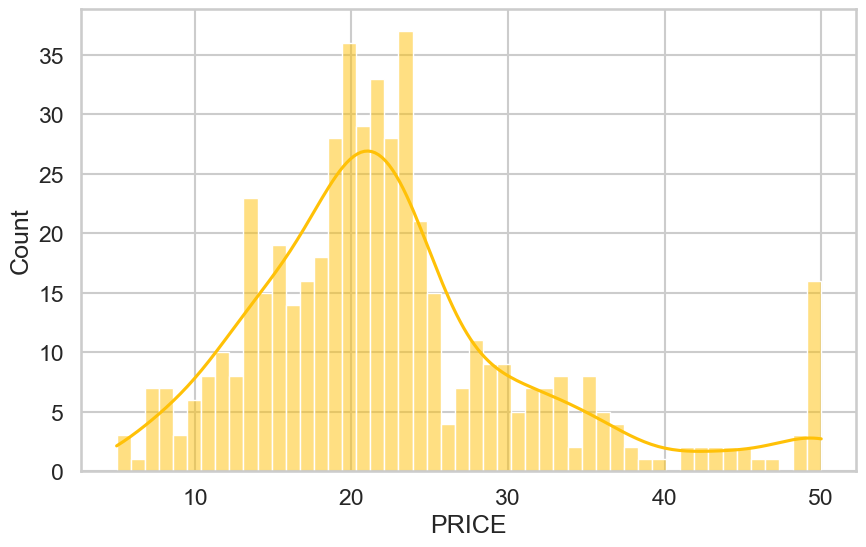

In [109]:

plt.figure(figsize=(10, 6))
sns.histplot(data.PRICE, bins=50, kde=True, color='#FFC107')
plt.show()

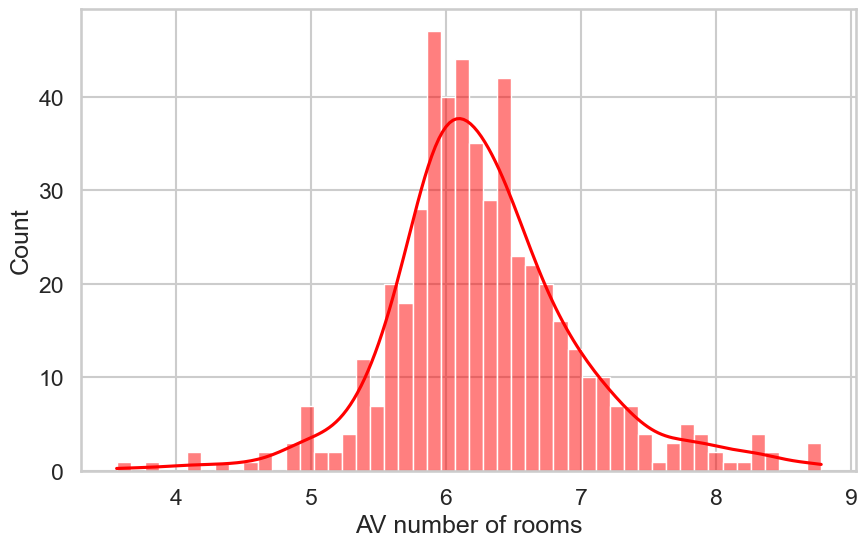

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(data.RM, bins=50, kde=True, color='red')
plt.xlabel('AV number of rooms')
plt.show()

In [111]:
data['RM'].mean()

6.284634387351779

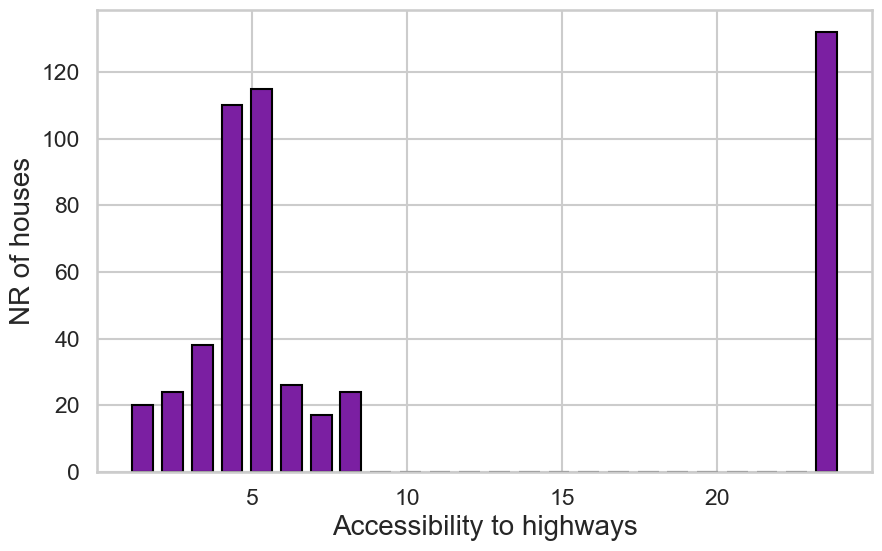

In [112]:
plt.figure(figsize=(10, 6))
plt.hist(data.RAD, bins=24, rwidth=0.7, ec='black', color='#7B1FA2')
plt.xlabel('Accessibility to highways', fontsize=20)
plt.ylabel('NR of houses', fontsize=20)
plt.show()

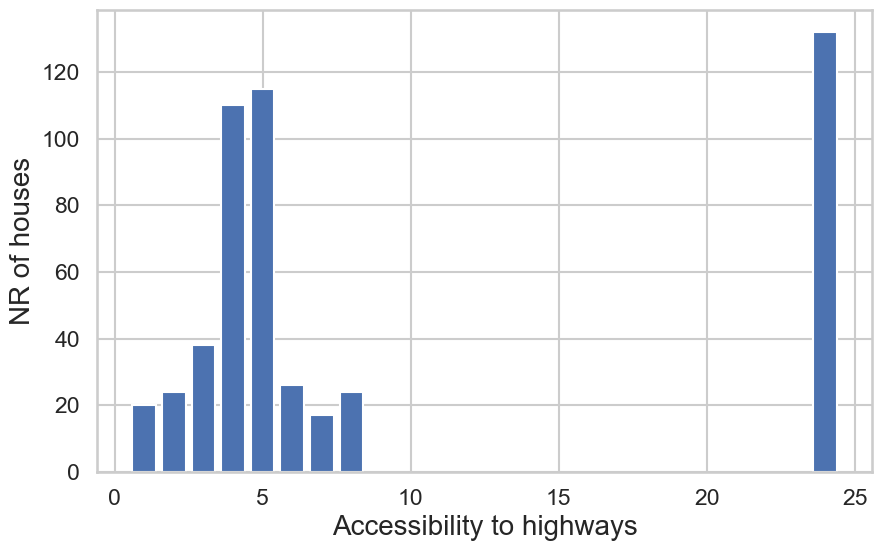

In [113]:
frequency = data.RAD.value_counts()

plt.figure(figsize=(10, 6))
plt.bar(frequency.index, height=frequency)
plt.xlabel('Accessibility to highways', fontsize=20)
plt.ylabel('NR of houses', fontsize=20)
plt.show()

In [114]:
data.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [115]:
data.drop('Unnamed: 0', inplace=True, axis=1)
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation
## $$ \rho_{xy} = corr(x, y) $$
## $$ -1.0 \leq \rho_{xy}\leq +1.0 $$

In [116]:
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [117]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375621

In [118]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [119]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

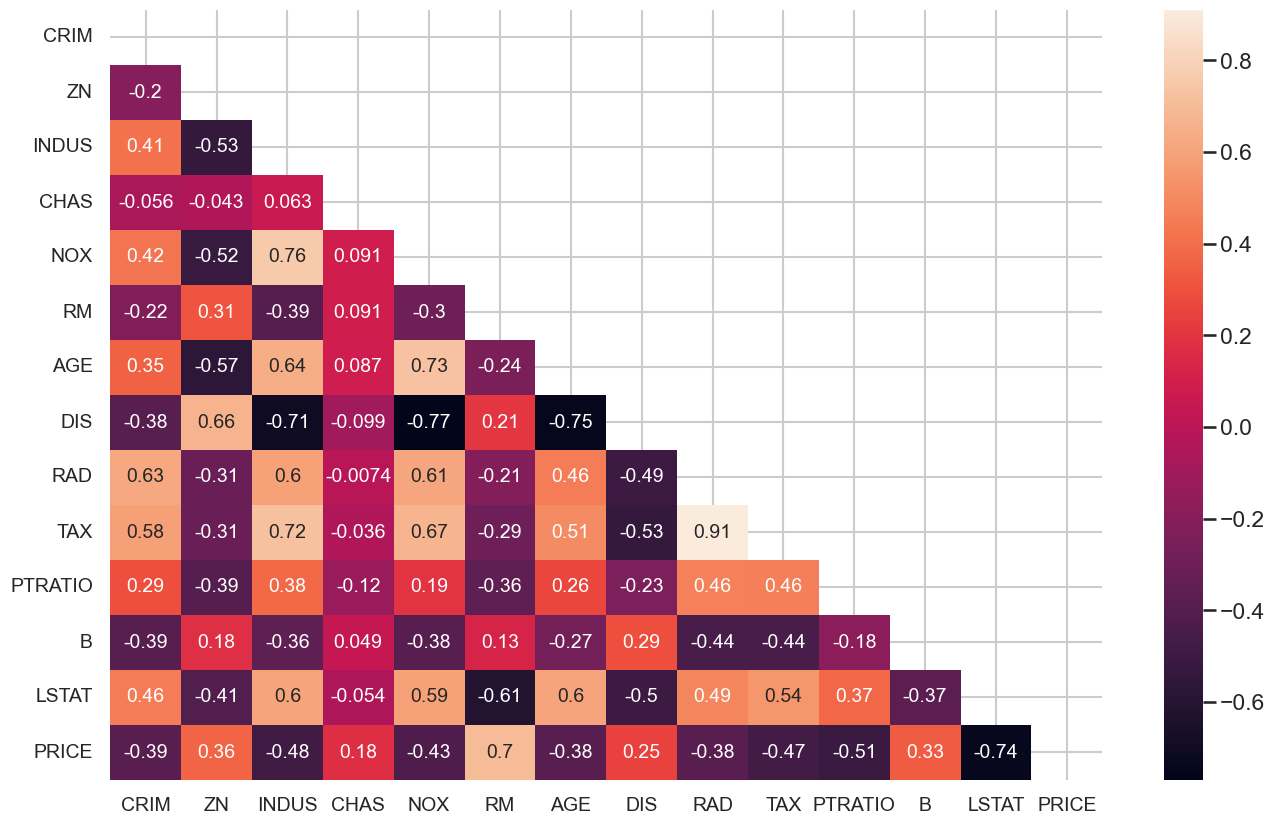

In [120]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

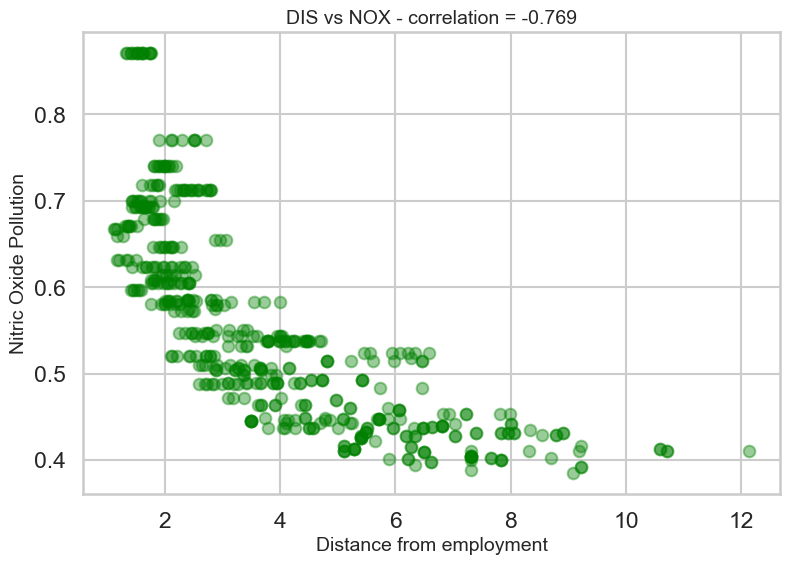

In [121]:
corr = round(data['DIS'].corr(data['NOX']), 3)

plt.figure(figsize=(9, 6))
plt.scatter(data['DIS'], data['NOX'], color='green', alpha=0.4, s=70)
plt.title(f'DIS vs NOX - correlation = {corr}', fontsize=14)
plt.xlabel('Distance from employment', fontsize=14)
plt.ylabel('Nitric Oxide Pollution', fontsize=14)
plt.show()

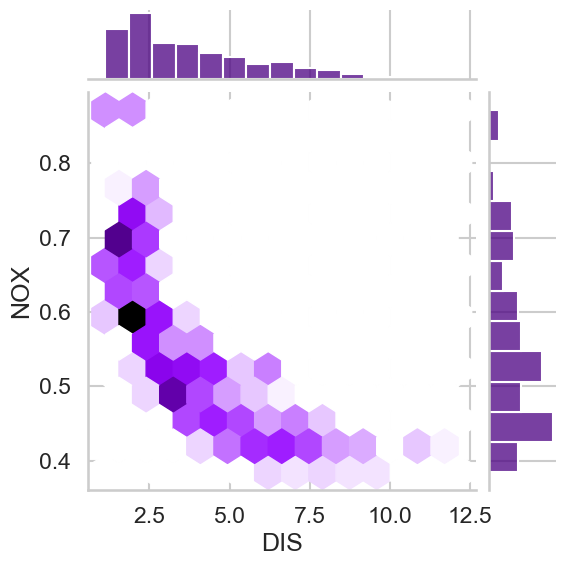

In [122]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data.DIS, y=data.NOX, kind='hex', color='indigo')
plt.show()

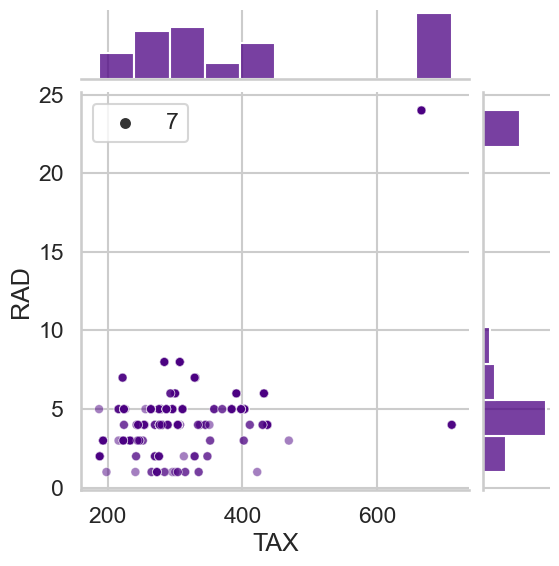

In [123]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data.TAX, y=data.RAD, color='indigo', size=7, joint_kws={'alpha':0.5})
plt.show()

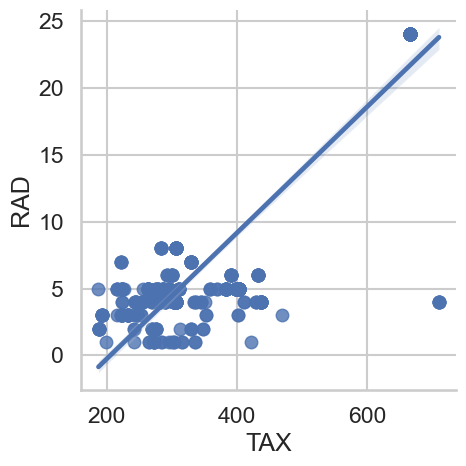

In [124]:
sns.lmplot(data=data, x='TAX', y='RAD')

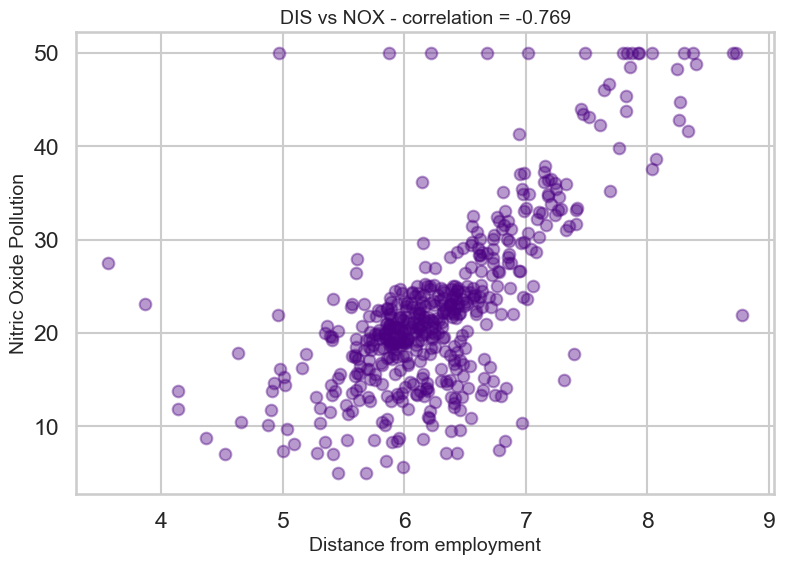

In [125]:
plt.figure(figsize=(9, 6))
plt.scatter(data['RM'], data['PRICE'], color='indigo', alpha=0.4, s=70)
plt.title(f'DIS vs NOX - correlation = {corr}', fontsize=14)
plt.xlabel('Distance from employment', fontsize=14)
plt.ylabel('Nitric Oxide Pollution', fontsize=14)
plt.show()

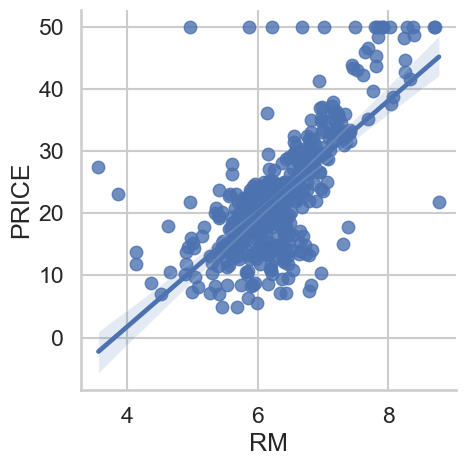

In [126]:
sns.lmplot(data=data, x='RM', y='PRICE')

In [127]:
# %%time
# sns.pairplot(data)
# plt.show()

## Training & Test Dataset Split

In [128]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

In [129]:
len(X_train)/len(features)

0.7984189723320159

In [130]:
X_train.shape[0]/ features.shape[0]

0.7984189723320159

## Multivariable Regression

In [131]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.intercept_)
coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])
print(coef)
print('training data r squared', regr.score(X_train, y_train))
regr.score(X_test, y_test)

36.533051382824524
              coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626
training data r squared 0.750121534530608


0.6709339839115651

In [132]:
data['PRICE'].skew()

1.1080984082549072

In [133]:
y_log = np.log(data['PRICE'])
y_skew = round(y_log.skew(), 2)

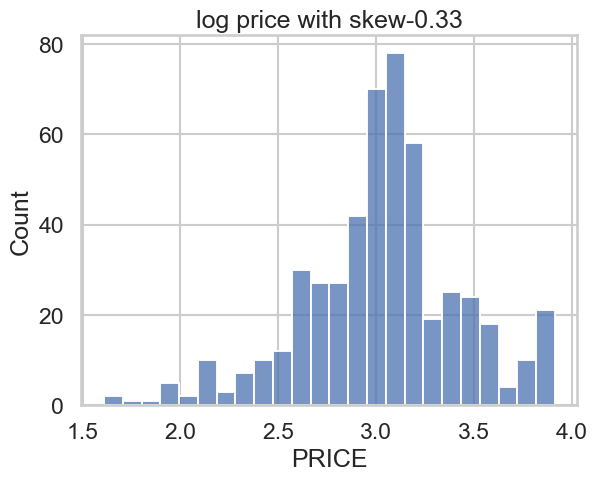

In [134]:
sns.histplot(y_log)
plt.title(f'log price with skew{y_skew}')
plt.show()

<Figure size 1000x600 with 0 Axes>

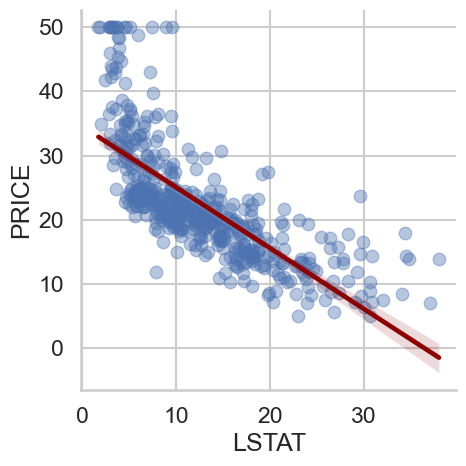

In [135]:
plt.figure(figsize=(10,6))
sns.lmplot(data=data, y='PRICE', x='LSTAT', line_kws={'color':'darkred'}, scatter_kws={'alpha':0.4})
plt.show()

<Figure size 1000x600 with 0 Axes>

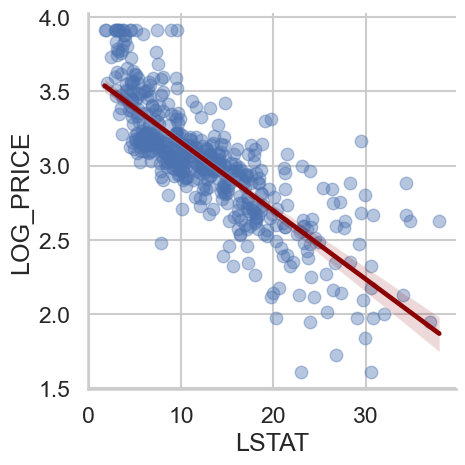

In [136]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

plt.figure(figsize=(10,6))
sns.lmplot(data=transformed_data, y='LOG_PRICE', x='LSTAT', line_kws={'color':'darkred'}, scatter_kws={'alpha':0.4})
plt.show()

## Regression using log prices

In [137]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

In [138]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.intercept_)
coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])
print(coef)
print('training data r squared', regr.score(X_train, y_train))
regr.score(X_test, y_test)

4.0599438717752
             coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390
training data r squared 0.7930234826697584


0.744692230626074

In [139]:
np.e**0.074602

1.0774552383518352

In [140]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
results.params
results.pvalues
pd.DataFrame({'coef': results.params, 'Pvalues': round(results.pvalues, 2)})


,coef,Pvalues
const,4.059944,0.00
CRIM,-0.010672,0.00
ZN,0.001579,0.01
INDUS,0.002030,0.44
CHAS,0.080331,0.04
NOX,-0.704068,0.00
RM,0.073404,0.00
AGE,0.000763,0.21
DIS,-0.047633,0.00
RAD,0.014565,0.00


## Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [141]:
variance_inflation_factor(exog=X_incl_const, exog_idx=1)

1.714525044393249

In [142]:
len(X_incl_const.columns)

14

In [143]:
X_incl_const.shape[1]

14

In [144]:
vif=[]
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const, exog_idx=i))
print(vif)

[597.5487126763895, 1.714525044393249, 2.3328224265597597, 3.943448822674638, 1.0788133385000576, 4.410320817897635, 1.8404053075678564, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.338671325536472, 2.812544292793036]


In [145]:
vif=[variance_inflation_factor(exog=X_incl_const, exog_idx=i)for i in range(X_incl_const.shape[1])]
pd.DataFrame({'coef_name': X_incl_const.columns, 'VIF':np.around(vif, 2)})

,coef_name,VIF
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Model Simplification & the BIC

In [146]:
# original model with all features and log prices
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
results.params
results.pvalues
org_coef = pd.DataFrame({'coef': results.params, 'Pvalues': round(results.pvalues, 2)})

print('rsquared:',results.rsquared)
print('BIC: ',results.bic)
org_mse = round(results.mse_resid, 3)
org_rsquared = round(results.rsquared, 3)


rsquared: 0.7930234826697582
BIC:  -139.74997769478853


In [147]:
#  model excluding INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const.drop('INDUS', axis=1, inplace=True)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
results.params
results.pvalues
coef_minus_indus = pd.DataFrame({'coef': results.params, 'Pvalues': round(results.pvalues, 2)})

print('rsquared:',results.rsquared)
print('BIC: ',results.bic)
reduced_mse = round(results.mse_resid, 3)
reduced_rsquared = round(results.rsquared, 3)

rsquared: 0.7927126289415164
BIC:  -145.14508855591185


In [148]:
#  model excluding INDUS and AGE
X_incl_const = sm.add_constant(X_train)
X_incl_const.drop(['INDUS', 'AGE'], axis=1, inplace=True)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
results.params
results.pvalues
reduced_coef = pd.DataFrame({'coef': results.params, 'Pvalues': round(results.pvalues, 2)})

print('rsquared:',results.rsquared)
print('BIC: ',results.bic)

rsquared: 0.7918657661852815
BIC:  -149.49934294224678


In [149]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

,coef,Pvalues,coef,Pvalues,coef,Pvalues
const,4.059944,0.00,4.056231,0.00,4.035922,0.00
CRIM,-0.010672,0.00,-0.010721,0.00,-0.010702,0.00
ZN,0.001579,0.01,0.001551,0.01,0.001461,0.01
INDUS,0.002030,0.44,NaN,NaN,NaN,NaN
CHAS,0.080331,0.04,0.082795,0.03,0.086449,0.02
NOX,-0.704068,0.00,-0.673365,0.00,-0.616448,0.00
RM,0.073404,0.00,0.071739,0.00,0.076133,0.00
AGE,0.000763,0.21,0.000766,0.21,NaN,NaN
DIS,-0.047633,0.00,-0.049394,0.00,-0.052692,0.00
RAD,0.014565,0.00,0.014014,0.00,0.013743,0.00


## Residuals and Residual plots

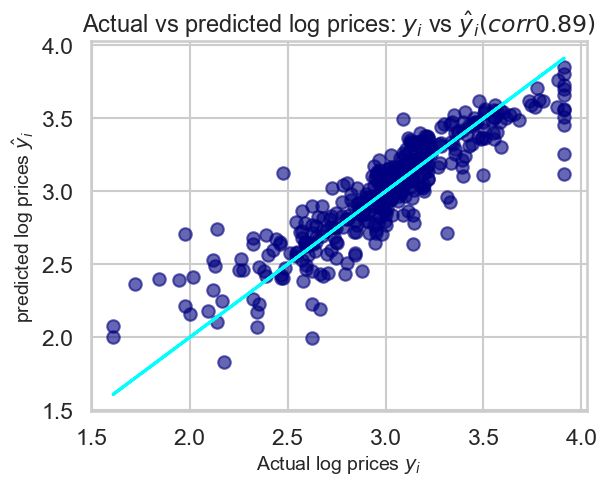

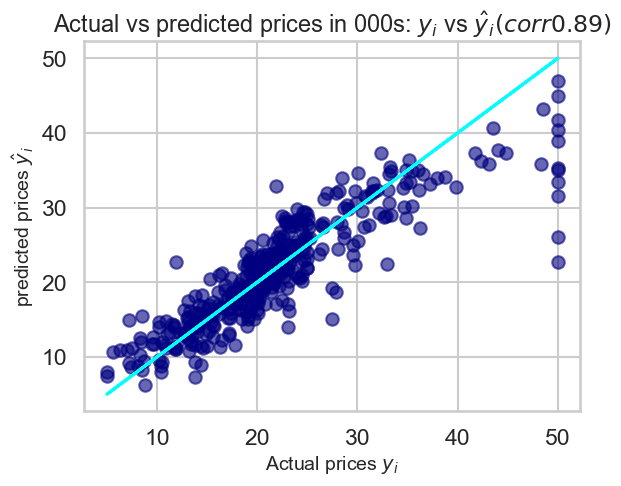

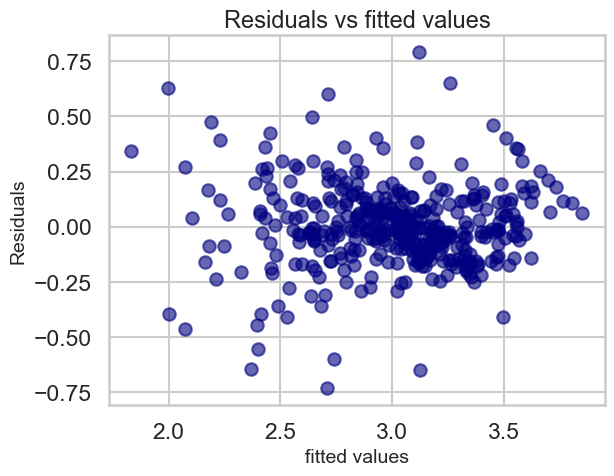

In [150]:
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# residuals = y_train - results.fittedvalues
# residuals
# results.resid
corr = round(y_train.corr(results.fittedvalues), 2)

plt.scatter(x=y_train, y= results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, c='cyan')
plt.title(f'Actual vs predicted log prices: $y_i$ vs $\hat y_i (corr{corr})$', fontsize=17)
plt.xlabel(f'Actual log prices $y_i$', fontsize=14)
plt.ylabel(f'predicted log prices $\hat y_i$', fontsize=14)

plt.show()

plt.scatter(x=np.e**y_train, y= np.e**results.fittedvalues, c='navy', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, c='cyan')
plt.title(f'Actual vs predicted prices in 000s: $y_i$ vs $\hat y_i (corr{corr})$', fontsize=17)
plt.xlabel(f'Actual prices $y_i$', fontsize=14)
plt.ylabel(f'predicted prices $\hat y_i$', fontsize=14)

plt.show()

plt.scatter(x=results.fittedvalues, y= results.resid, c='navy', alpha=0.6)
plt.title(f'Residuals vs fitted values', fontsize=17)
plt.ylabel(f'Residuals', fontsize=14)
plt.xlabel(f'fitted values', fontsize=14)

plt.show()

In [151]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

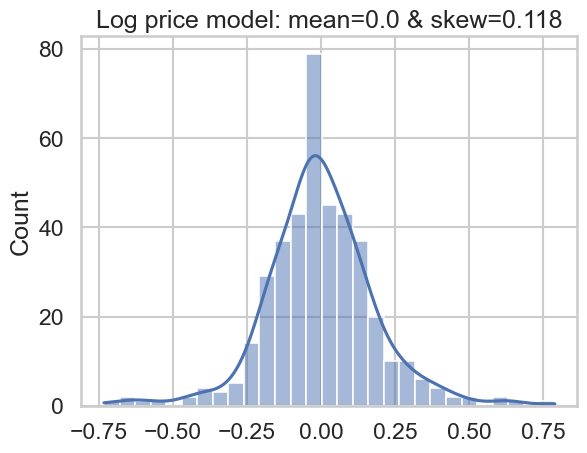

In [152]:
sns.histplot(results.resid, kde=True)
plt.title(f'Log price model: mean={resid_mean} & skew={resid_skew}')
plt.show()

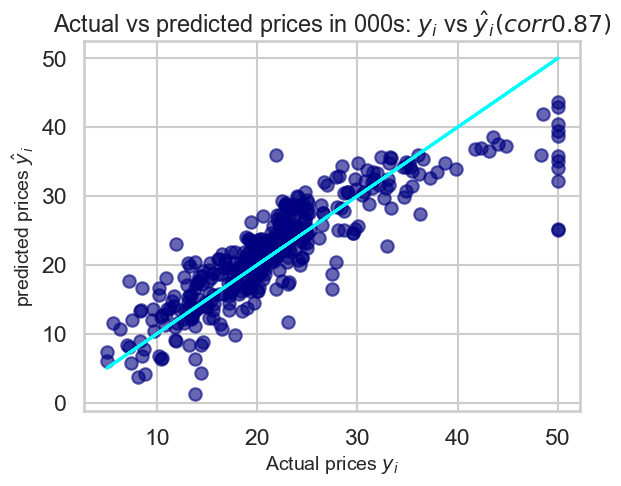

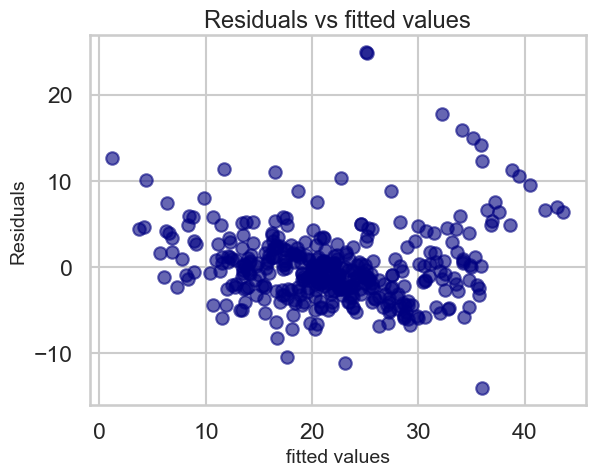

In [153]:
prices = data['PRICE']
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# residuals = y_train - results.fittedvalues
# residuals
# results.resid
corr = round(y_train.corr(results.fittedvalues), 2)

plt.scatter(x=y_train, y= results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, c='cyan')
plt.title(f'Actual vs predicted prices in 000s: $y_i$ vs $\hat y_i (corr{corr})$', fontsize=17)
plt.xlabel(f'Actual prices $y_i$', fontsize=14)
plt.ylabel(f'predicted prices $\hat y_i$', fontsize=14)
plt.show()

plt.scatter(x=results.fittedvalues, y= results.resid, c='navy', alpha=0.6)
plt.title(f'Residuals vs fitted values', fontsize=17)
plt.ylabel(f'Residuals', fontsize=14)
plt.xlabel(f'fitted values', fontsize=14)
plt.show()
org1_mse = round(results.mse_resid, 3)
org1_rsquared = round(results.rsquared, 3)

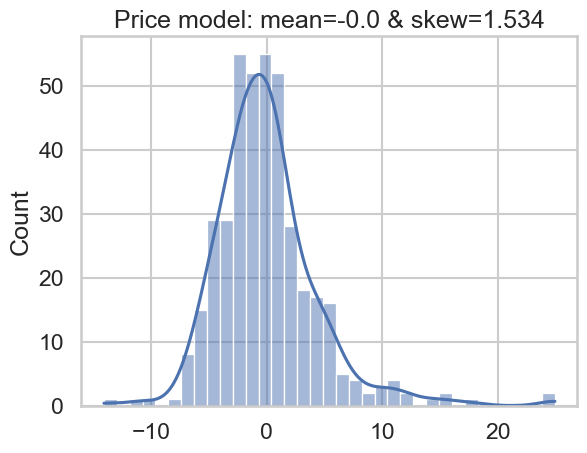

In [154]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.histplot(results.resid, kde=True)
plt.title(f'Price model: mean={resid_mean} & skew={resid_skew}')
plt.show()

In [157]:
pd.DataFrame({'MSE': [org1_mse, org_mse, reduced_mse], 'rsquared': [org1_rsquared, org_rsquared, reduced_rsquared],
             'RMSE': np.sqrt([org1_mse, org_mse, reduced_mse])},
            index=['Price', 'Log_price', 'log_price_ommited'])

,MSE,rsquared,RMSE
Price,19.884,0.749,4.459148
Log_price,0.035,0.793,0.187083
log_price_ommited,0.035,0.793,0.187083


In [161]:
np.e**(np.log(30)+ 2*np.sqrt(0.035))

43.61334233239937